# SENTIMENTAL ANALYSIS USING PYTHON

Twitter is a social networking site where people communicate in short messages called tweets.Tweeting means posting short messages to follow you on twitter with an intention that the messages might be helpful for taking a decision


Data were collected from twitter with help of Twitter API, The twitter API is a set of URL's that take parameter.These URLs help access many features of twitter,such as posting a tweet that contain a word etc .The twitter account was made using the following steps
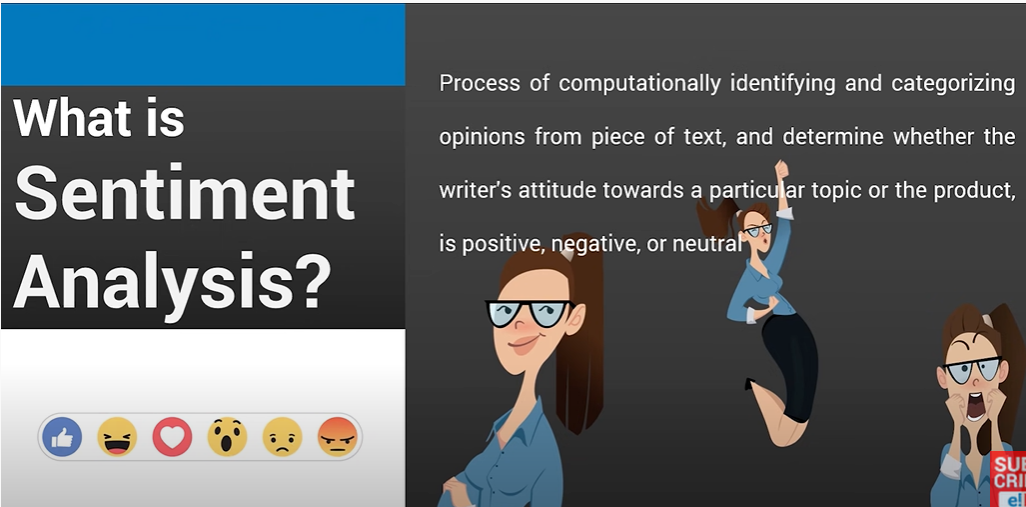

# SENTIMENTAL ANALYSIS
Sentimental analysis is basically the process of determining the attitude or the emotion  of the writer , that is positive, negative or neutral

Polarity is a float lies between the range [-1,1] where 1 means positive , zero means negative and 0.5 means neutral

 We tried to find the polarity and tried ploting in a pie chart , it was found that 60% of tweets mentioning the name of Elon musk was neutral and remaining was positive
 When calculating sentiment for a single word, TextBlob uses a sophisticated technique known to mathematicians as “averaging”.
 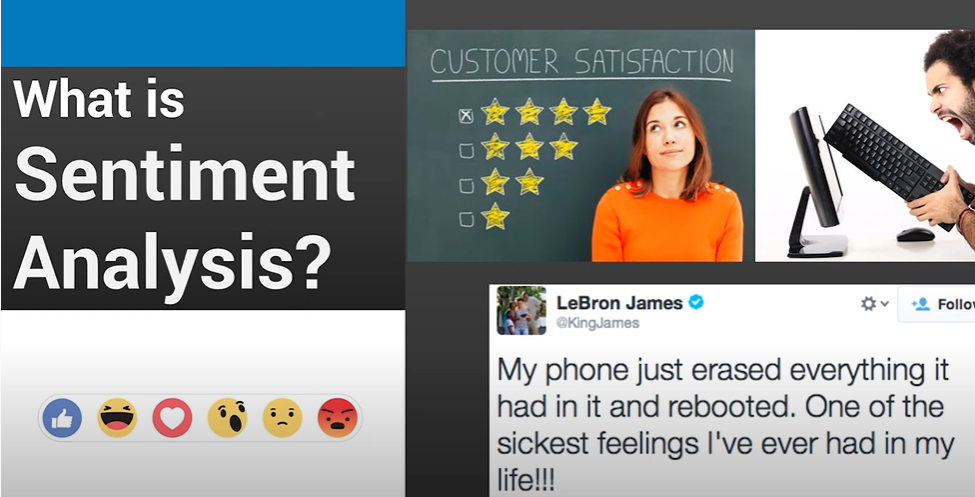
 
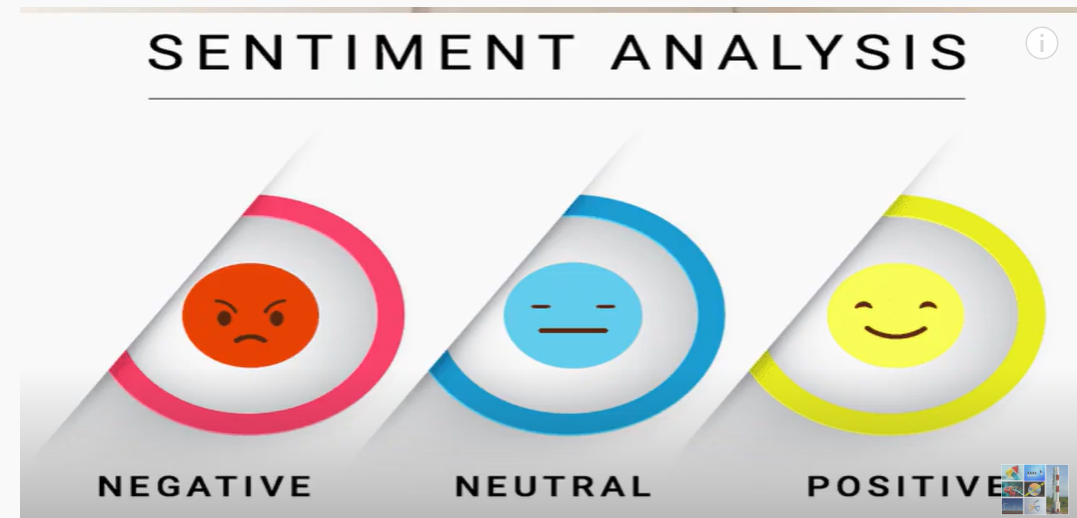
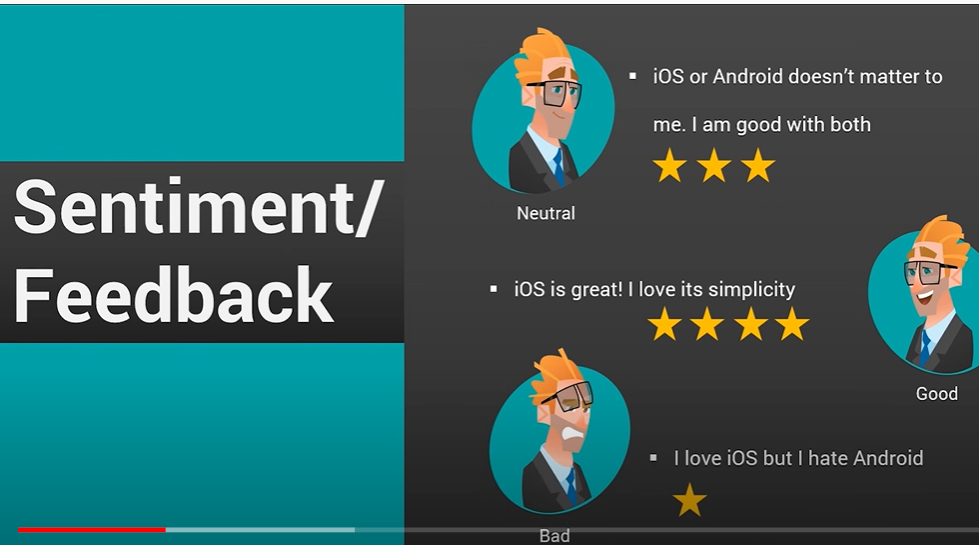
 

# LIBRARY USED
 Tweepy - for extracting data from twitter account through twitter api and acess twitter api
 
 Textblob - TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more
 Used to retrive polarity and subjectivity- most common terminology used in sentimental analysis -
 Polarity refers to emotions expressed in text, like if a person tweeting is sad, happy, neutral
 Subjectivity refers to expressing ones own feeling, belief,or opinion
 
 Pandas - For creating dataframe from data extracted from twitter
 
 nltk   - Natural language processing - mainly called to perform NLP task on the data. Function such  
                  stemming, regular expression and removing stopwords were done to built a model on navie bayes classifier
                  
                  
 Naive bayes -To bulid the model 
 
 Classifaction Report - To bulid the confusion matrix

For each and every apps 
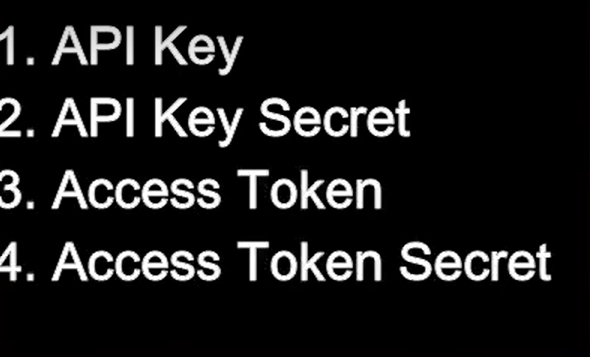

In [1]:

import pandas as pd
import tweepy

# create a list of records
tweet_info_ls = []

# copy & paste the bearer token here 
MY_BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAIXaZwEAAAAASnVJp5N%2By1ilQatUNoUYoR1vvVA%3D5WzOQreD8eCbysj0feo5drNaKTbUgcY4S4av0MFxiSvkutfINZ"

# create your client 
client = tweepy.Client(bearer_token=MY_BEARER_TOKEN)

# set up the search keywords/hashtags or query to get the tweets 
searchQuery = '#Elon Musk lang:en -is:retweet'
tweets = client.search_recent_tweets(searchQuery,
                                            tweet_fields = ["created_at", "text", "source"],
                                             user_fields = ["name", "username", "location", "verified", "description"],
                                             max_results = 100,
                                             expansions='author_id')
# iterate over each tweet and corresponding user details
for tweet, user in zip(tweets.data, tweets.includes['users']):
    tweet_info = {
        'created_at': tweet.created_at,
        'text': tweet.text,
        'source': tweet.source,
        'name': user.name,
        'username': user.username,
        'location': user.location,
        'verified': user.verified,
        'description': user.description
    }
    tweet_info_ls.append(tweet_info)

    

# create dataframe from the extracted records
tweets_df = pd.DataFrame(tweet_info_ls)
# display the dataframe
tweets_df.head()


,created_at,text,source,name,username,location,verified,description
0,2022-05-08 17:31:55+00:00,Cole Seer https://t.co/0m7ktueV1X via @YouTub...,Twitter for iPhone,Cole Seer,iamcoleseer,Jersey City,False,Artist/Producer/Click The Link To My YouTube C...
1,2022-05-08 17:15:07+00:00,@jeff_swarens @SandySunshine1 @CalltoActivism ...,Twitter for Android,silvertag74,Werid0boho,none ur business,False,hi
2,2022-05-08 17:14:46+00:00,"‘Elon Musk, if you don’t end up buying Twitter...",IFTTT,ElonIsUp,elonisup,None,False,All Elon. All the time.
3,2022-05-08 17:14:44+00:00,How Elon Musk Might Change Twitter – The New Y...,IFTTT,"Av.Bülent Özer-Founder of ""United States of Mars""",Avbozer,Ankara /Turkey,False,"""Founder of ""United States of Mars"" avbulentoz..."
4,2022-05-08 17:14:42+00:00,Adar Poonawalla urges Elon Musk to invest in I...,IFTTT,promusk,SherAli24875009,None,False,elon must pro


In [55]:
# creating a dataframe extracting only text from previous dataframe tweets_df
a=tweets_df.iloc[:,1:2]
a
# calling libraries for text preprocessing and to extract polarity and subjectivity
import re
from textblob import TextBlob
a.head()

,text
0,Cole Seer https://t.co/0m7ktueV1X via @YouTub...
1,@jeff_swarens @SandySunshine1 @CalltoActivism ...
2,"‘Elon Musk, if you don’t end up buying Twitter..."
3,How Elon Musk Might Change Twitter – The New Y...
4,Adar Poonawalla urges Elon Musk to invest in I...


In [56]:
#defining the function for text preprocessing using re library 
def cleanuptweet(txt):
    txt=re.sub(r'@[A-Za-z0-9_]+','',txt)
    txt=re.sub(r'#','',txt)
    txt=re.sub(r'RT: ','',txt)
    txt=re.sub(r'https?:\/\/[[A-Za-z0-9\.\/]+','',txt)
    re.sub('\n',' ',txt)
    return(txt)

In [57]:
a['text']=a['text'].apply(cleanuptweet) # creating an object for the function cleanuptweet passing it through apply function

In [58]:
a.head()

,text
0,Cole Seer via ElonMusk sundayvibes SundayB...
1,Keep up the good fight so many want to supp...
2,"‘Elon Musk, if you don’t end up buying Twitter..."
3,How Elon Musk Might Change Twitter – The New Y...
4,Adar Poonawalla urges Elon Musk to invest in I...


In [59]:
# creating the function for the polarity
def getTextPolarity(txt):

    return TextBlob(txt).sentiment.polarity # emotions in particular tweets positive, negative, neutral


In [60]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity #feeling,opinion

In [61]:
# creating the object and calling the function
a['subjectivity']=a['text'].apply(getTextSubjectivity)
a['polarity']=a['text'].apply(getTextPolarity)

In [62]:
a.head()

,text,subjectivity,polarity
0,Cole Seer via ElonMusk sundayvibes SundayB...,0.000000,0.000000
1,Keep up the good fight so many want to supp...,0.520000,0.640000
2,"‘Elon Musk, if you don’t end up buying Twitter...",0.000000,0.000000
3,How Elon Musk Might Change Twitter – The New Y...,0.454545,0.136364
4,Adar Poonawalla urges Elon Musk to invest in I...,0.000000,0.000000


In [63]:
a=a.drop(a[a['text']==''].index)
a=a.drop(a[a['text']=='\n'].index)
a.head()

,text,subjectivity,polarity
0,Cole Seer via ElonMusk sundayvibes SundayB...,0.000000,0.000000
1,Keep up the good fight so many want to supp...,0.520000,0.640000
2,"‘Elon Musk, if you don’t end up buying Twitter...",0.000000,0.000000
3,How Elon Musk Might Change Twitter – The New Y...,0.454545,0.136364
4,Adar Poonawalla urges Elon Musk to invest in I...,0.000000,0.000000


In [66]:
# defining the function to create a new coloumn to rank polarity to positive, negative and neutral
def getanalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "neutral"
    else:
        return "positive"

In [67]:
a['score']=a['polarity'].apply(getanalysis) # calling the function


In [68]:
a.head()

,text,subjectivity,polarity,score
0,Cole Seer via ElonMusk sundayvibes SundayB...,0.000000,0.000000,neutral
1,Keep up the good fight so many want to supp...,0.520000,0.640000,positive
2,"‘Elon Musk, if you don’t end up buying Twitter...",0.000000,0.000000,neutral
3,How Elon Musk Might Change Twitter – The New Y...,0.454545,0.136364,positive
4,Adar Poonawalla urges Elon Musk to invest in I...,0.000000,0.000000,neutral


# Creating a pie chart to visualize the sentiment

In [69]:
positive=a[a['score']=='positive']


pos=positive.shape[0]/a.shape[0]*100

In [70]:
nega=a[a['score']=='neutral']

neg=nega.shape[0]/a.shape[0]*100

In [71]:
neuta=a[a['score']=='negative']

ne=neuta.shape[0]/a.shape[0]*100

(-1.1266924523450506,
 1.2098311822505528,
 -1.1279201268314174,
 1.1457911760182966)

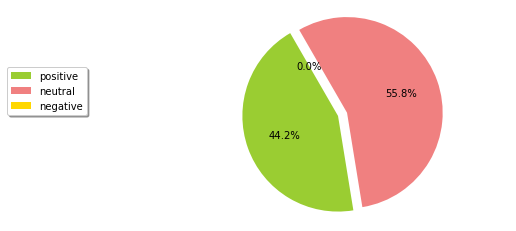

In [72]:
import matplotlib.pyplot as plt
explode=(0,0.1,0)
labels='positive','neutral','negative'
sizes=(pos,neg,ne)
colors=['yellowgreen','lightcoral','gold']
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.5,0.5),shadow=True)
plt.axis('equal')

# CREATING A MODEL

In [74]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus=[]
for i in range(50):
    word=re.sub('[^a-zA-Z]',' ',a['text'][i])
    ps=PorterStemmer()
    word=word.lower()
    word=word.split()
    stopwrs=stopwords.words('english')
    #removing not from stipwords
    stopwrs.remove('not')
    word=[ps.stem(w) for w in word if not w in set(stopwrs)]
    word=' '.join(word)
    corpus.append(word)
    

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit(corpus)
X=cv.transform(corpus)
X = pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
X.head()


,accord,acquir,acquisit,ad,adar,advic,advis,advoc,afraid,african,...,win,woke,work,world,would,wssu,yla,york,zero,zeroga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
y=pd.DataFrame(y)
y=y[:50]
y.head()

,score
0,neutral
1,positive
2,neutral
3,positive
4,neutral


In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [85]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

C:\Users\adhar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [86]:
y_pred=gnb.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[0, 1, 2],
       [0, 3, 0],
       [1, 1, 2]], dtype=int64)

In [88]:
b=print(classification_report(y_test,y_pred))
ab=pd.DataFrame(b)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         3
     neutral       0.60      1.00      0.75         3
    positive       0.50      0.50      0.50         4

    accuracy                           0.50        10
   macro avg       0.37      0.50      0.42        10
weighted avg       0.38      0.50      0.42        10

